In [30]:
import shapely
import pandas as pd
from shapely.geometry import LineString
from shapely.geometry import Point
import osmnx as ox
import geopandas as gpd
from numpy.linalg import norm
import numpy as np
import math
from matplotlib import pyplot as plt
import contextily as cx
from pyproj.crs import CRS
import scipy
from datetime import timedelta
import pyproj

from shapely.ops import linemerge

import route2vel
import route2vel.utils as utils
from route2vel.loading import load_graph
import route2vel
from notebookutils import *

from route2vel.interp import *
from route2vel.route import *
from route2vel.classes import *

In [31]:
from route2vel.postprocess import *

In [32]:
%load_ext autoreload
%autoreload 2

In [33]:
# plt.style.use('dark_background')
route2vel.load_config("..", force=True)
ox.settings.use_cache = False
cx.set_cache_dir(route2vel.cfg['resources_dir'] + '/contextily_cache')

In [77]:
# route_steps = ["Zola Predosa", "Robopac"]
# direction = route2vel.find_route_osrm(route_steps, load_graph=True, load_graph_name='thesis_img_route_1')

route_steps = ["44.47620, 11.37330", "44.39960, 11.24760"]
direction = route2vel.find_route_osrm(route_steps, load_graph=True, load_graph_name='thesis_img_route_2')

Downloaded in 2.88s!
Saved raw copy to d:\Documenti\Universita\tesim\route2vel\resources\graph\thesis_img_route_2_raw.graphnx.pickle!
Simplifying... (strict=True)
Simplified!
Filled geometry. Added geometry in 708 edges
Adding elevation...


100%|██████████| 14/14 [00:18<00:00,  1.34s/it]


Added elevation in 18.77s
Added edge grades
Added edge speeds
Added edge travel times
Saved to d:\Documenti\Universita\tesim\route2vel\resources\graph\thesis_img_route_2.graphnx.pickle


In [78]:
print(f"Route length: {len(direction.geometry)} (osm nodes: {len(direction.nodelist())})")

Route length: 40 (osm nodes: 87)


In [79]:
interp_dir = route2vel.interp_from_route(direction)

In [ ]:
# interp_dir.plot()

In [81]:
meters_density = 0.1
pt_num = interp_dir.pt_num_for_density(meters_density)
print(f"For meters density {meters_density}m using {pt_num} points")

For meters density 0.1m using 203840 points


Testing with a roundabout tract (see [workflow_2.ipynb](./workflow_2.ipynb)).

In [88]:
route_bounds_ = [
    # with 1
    # ((44.42342, 11.60047), (44.42739, 11.60833)),
    # ((44.48620, 11.26211), (44.49203, 11.27161)),
    # with 2
    ((44.39454, 11.29102), (44.39052, 11.29818)),
    ((44.38711, 11.31984), (44.39294, 11.33067)),
]
route_bounds = [
    tuple(coord[::-1] for coord in coords) for coords in route_bounds_
]

In [89]:
# For testing, just crop the whole route instead of finding another shorter one
utils.debug = True
gdf = interp_dir.get_points_with_num(pt_num, return_gdf=True, in_meters=True, gdf_columns=['base_idx', 'junction', 'speed_kph'])
proj_crs = gdf.crs
gdf["ele"] = gdf.geometry.apply(lambda p: p.z)

Projecting to UTM zone 32 (auto, from point [11.33223054 44.42553822])


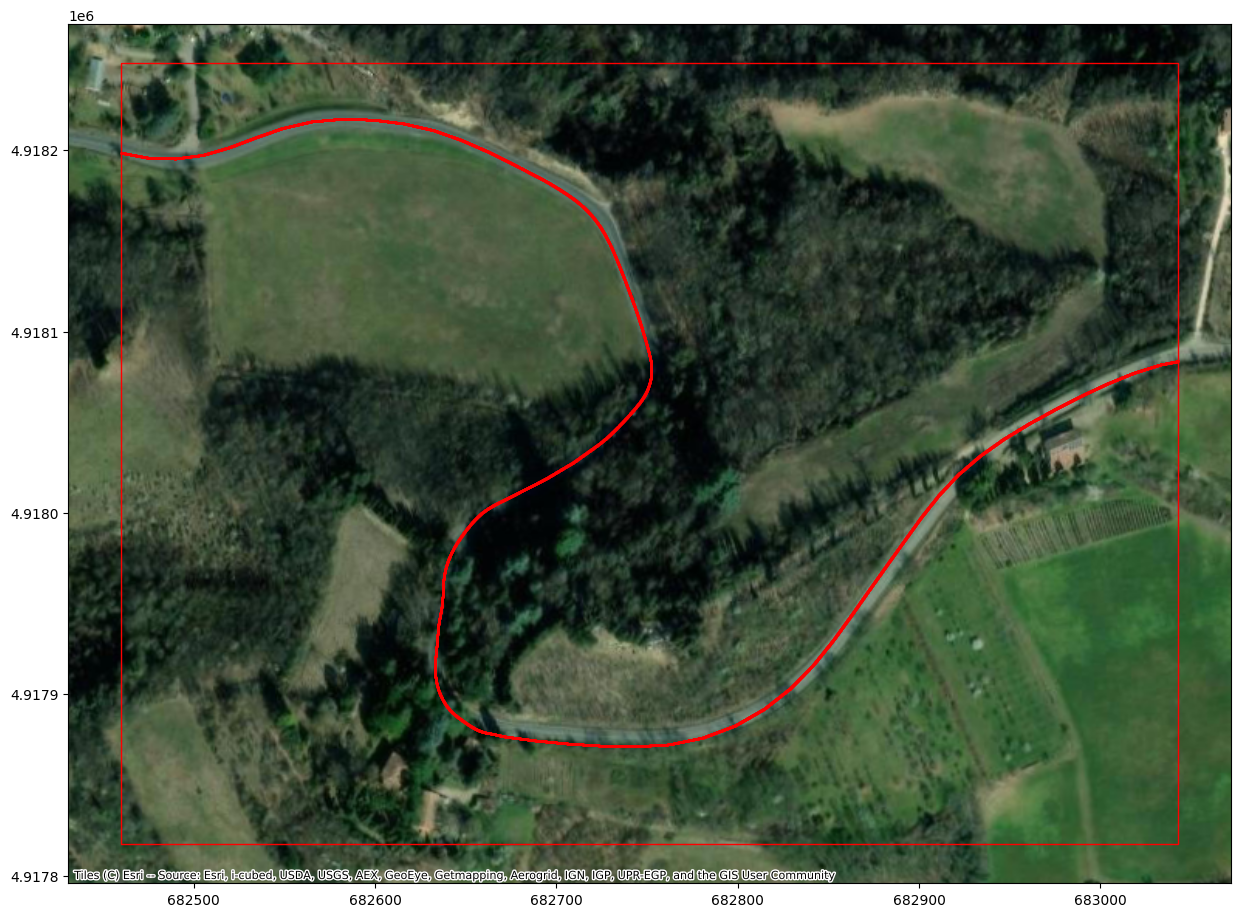

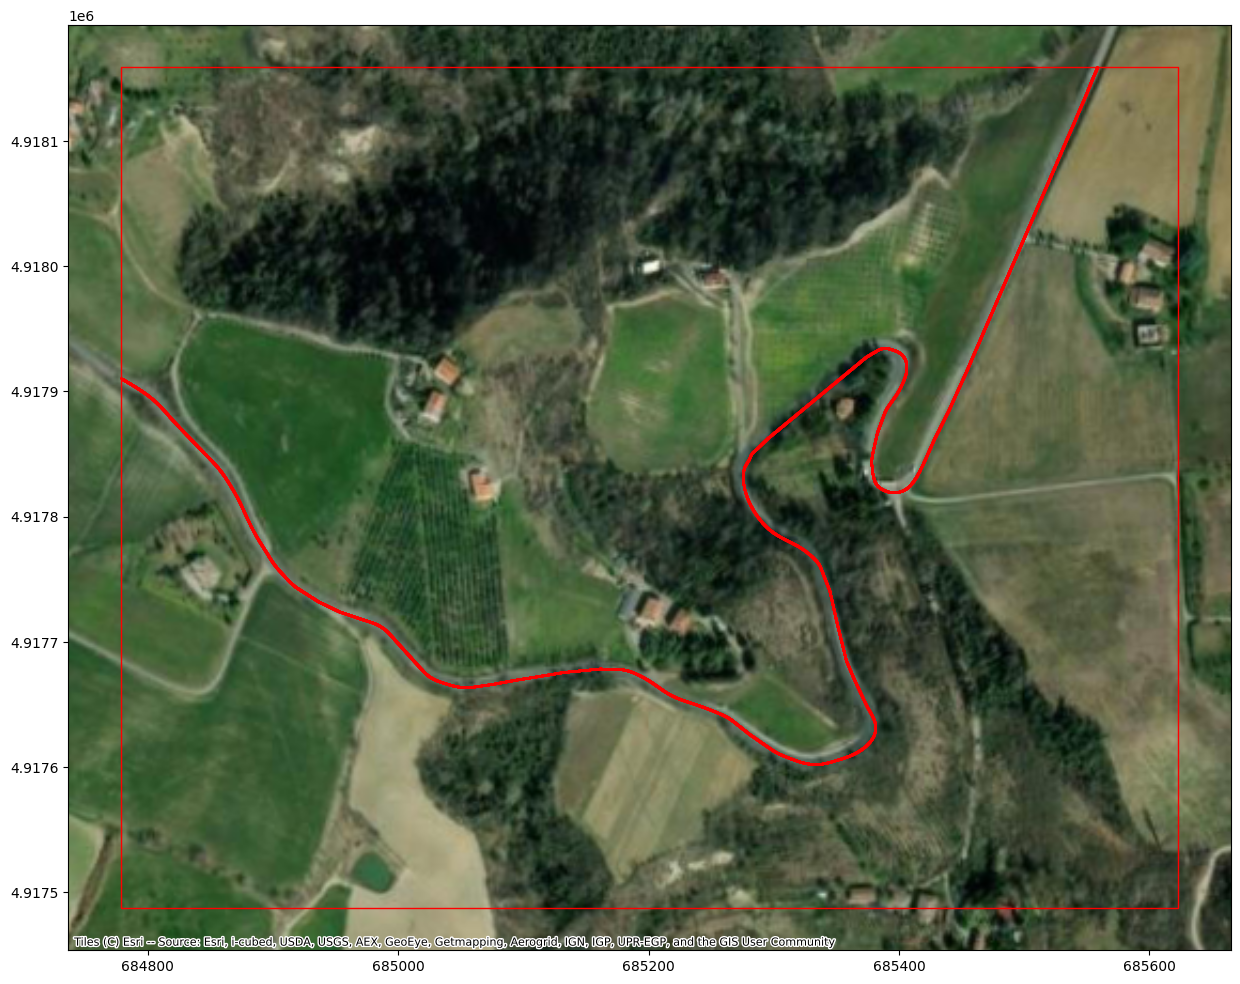

In [90]:
tr = pyproj.Transformer.from_crs(direction.gdf.crs, gdf.crs, always_xy=True).transform
for bounds in route_bounds:
    display_bounded_shapes([
            (gdf.reset_index(), {
                # 'column': 'ele', 
                'color': 'red',
                # 's': 10,
                'linewidth': 0.3,
                'markersize': 2,
            }),
        ], 
        tr(*bounds[0]), tr(*bounds[1]), crs=gdf.crs, figsize=(15,15),
        map_source=cx.providers.Esri.WorldImagery,
    );